In [23]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [24]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
k = 140  # количество выборок для случайной величины W


In [25]:
# 1.1 Интервальная оценка для математического ожидания при известной дисперсии
X = np.random.normal(a, sigma, size=n)
t_gamma = st.norm.ppf(1/2 + gamma/2)
a_left_known = X.mean() - sigma * t_gamma / np.sqrt(n)
a_right_known = X.mean() + sigma * t_gamma / np.sqrt(n)
print("1.1. Доверительный интервал (известная дисперсия):", (a_left_known, a_right_known))

print("1.1. Доверительный интервал (известная дисперсия, метод interval): ", st.norm.interval(confidence=gamma, loc=X.mean(), scale=sigma/np.sqrt(n)))


1.1. Доверительный интервал (известная дисперсия): (-1.3131898271558282, -0.24092616629698782)
1.1. Доверительный интервал (известная дисперсия, метод interval):  (-1.3131898271558282, -0.24092616629698793)


In [26]:
# 1.2 Интервальная оценка для математического ожидания при неизвестной дисперсии
a_estimate = np.mean(X)
sigma_estimate = np.std(X, ddof=1)
t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
print("1.2. Доверительный интервал (неизвестная дисперсия):", (a_left_unknown, a_right_unknown))
print("1.2. Доверительный интервал (неизвестная дисперсия, метод interval): ", st.t.interval(confidence=gamma, loc=a_estimate, scale=sigma_estimate/np.sqrt(n), df=n-1))


1.2. Доверительный интервал (неизвестная дисперсия): (-1.4282133633929543, -0.1259026300598619)
1.2. Доверительный интервал (неизвестная дисперсия, метод interval):  (-1.428213363392954, -0.1259026300598619)


In [27]:
# 1.3 Интервальная оценка для дисперсии
delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
s2 = np.var(X, ddof=1)
sigma2_left = (n - 1) * s2 / delta_0
sigma2_right = (n - 1) * s2 / delta_1
print("1.3. Доверительный интервал для дисперсии:", (sigma2_left, sigma2_right))


1.3. Доверительный интервал для дисперсии: (1.6516569904500802, 5.091823595731415)


In [28]:
# 2. Зависимость длины доверительного интервала от надежности
V = 500
gamma_values = np.linspace(0.7, 0.999, V)
interval_lengths_mx = []
interval_lengths_var = []
interval_lengths_mx_unknown = []

for g in gamma_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)

    interval_lengths_mx_unknown.append(interval_mx_unknown)
    interval_lengths_mx.append(interval_mx)
    interval_lengths_var.append(interval_var)


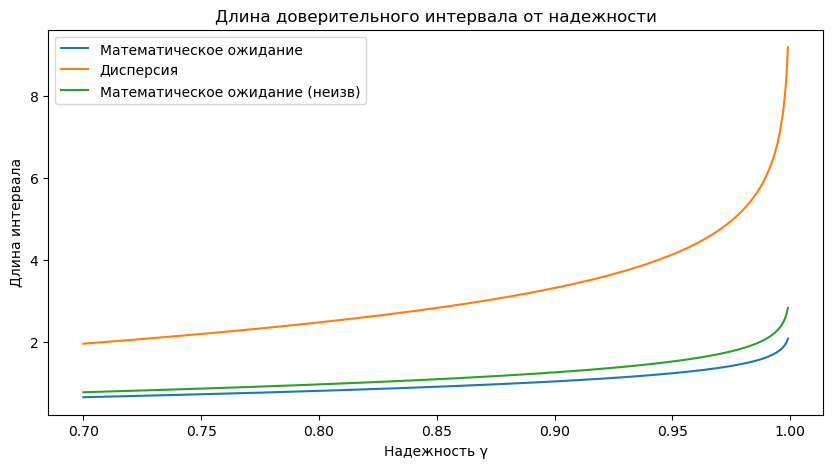

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, interval_lengths_mx, label="Математическое ожидание")
plt.plot(gamma_values, interval_lengths_var, label="Дисперсия")
plt.plot(gamma_values, interval_lengths_mx_unknown, label="Математическое ожидание (неизв)")
plt.xlabel("Надежность γ")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от надежности")
plt.show()

In [30]:
# 3. Зависимость длины интервала от объема выборки
n_values = range(5, 51)
lengths_mx = []
lengths_mx_unk = []
lengths_var = []

for n in n_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    lengths_mx_unk.append(interval_mx_unknown)
    lengths_mx.append(interval_mx)
    lengths_var.append(interval_var)

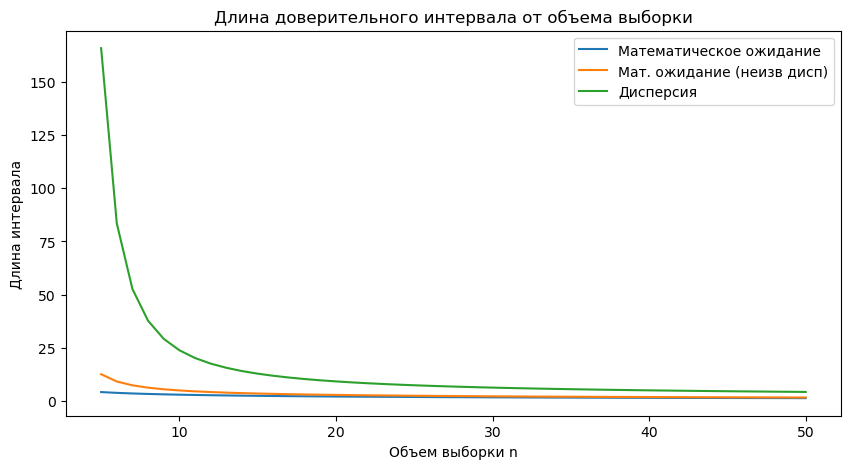

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, lengths_mx, label="Математическое ожидание")
plt.plot(n_values, lengths_mx_unk, label="Мат. ожидание (неизв дисп)")
plt.plot(n_values, lengths_var, label="Дисперсия")
plt.xlabel("Объем выборки n")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от объема выборки")
plt.show()

In [32]:
# 4. Оценка γ* при неизвестной дисперсии
count_gamma = 0
confidence_array = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
    a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
    a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
    confidence_array.append((a_left_unknown, a_right_unknown))
    if a_left_unknown <= a <= a_right_unknown:
        count_gamma +=1


print("Доверительный интервал для каждой из M выборок: ")
print(confidence_array)
gamma_star = count_gamma / M
print("4. Фактическая γ*:", gamma_star)

Доверительный интервал для каждой из M выборок: 
[(-0.5352897859014484, 0.26216056744732363), (-0.3959080232554986, 0.4015423300932734), (-0.16090090163363865, 0.6365494517151333), (-0.6410391294181008, 0.15641122393067122), (-0.4205948788994243, 0.3768554744493477), (-0.6728414895146637, 0.12460886383410824), (-0.17783269318349545, 0.6196176601652765), (-0.19824618619154089, 0.5992041671572311), (-0.5677542303262044, 0.22969612302256756), (-0.30067227233002825, 0.49677808101874377), (-0.4815756540106627, 0.3158746993381093), (-0.376549204578959, 0.420901148769813), (-0.41133432918005086, 0.38611602416872115), (-0.24441402942759158, 0.5530363239211804), (-0.3481993154360578, 0.4492510379127142), (-0.5398481784446418, 0.2576021749041302), (-0.2834723209590512, 0.5139780323897207), (-0.12979008948565607, 0.6676602638631159), (-0.37425712716229015, 0.42319322618648186), (-0.16593456944267446, 0.6315157839060975), (-0.5984863262699565, 0.19896402707881555), (-0.25695673171443845, 0.5404936

In [33]:
# 5. Анализ случайной величины Z
Z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s_2 = np.var(X, ddof=1)
    Z = (X.mean() - a) / (np.sqrt(s_2) / np.sqrt(n))
    Z_values.append(Z)
Z_values


[0.222660508180742,
 -0.8888048944826742,
 -0.8997132420967574,
 -0.8605348272943035,
 -0.7707102942704109,
 1.5718279642748827,
 1.111789116895633,
 0.27716872518330593,
 0.12236592023187441,
 1.5943645735182919,
 0.5971994016369165,
 -0.42707250739665337,
 0.9756450722159988,
 1.7155774057636133,
 -0.5467728781863564,
 0.7598646544017051,
 0.6938550952765514,
 0.5691136697242567,
 0.7081091808435346,
 1.3872649308997287,
 -0.8500846090882044,
 -0.06098808316390229,
 -0.03735716114001768,
 -0.7309850907399442,
 -0.6509473376841285,
 -1.3522027499161322,
 -0.10419697436055185,
 0.44390411863484175,
 0.5885611168457225,
 -1.002762790336487,
 0.8080297631313231,
 -0.6993332738013062,
 -0.4320242205435185,
 0.23722826839267078,
 -0.1421037618196138,
 -0.5625527373902393,
 0.9768190551249153,
 -0.09561131459073961,
 -0.8028843270227479,
 1.0213286421619812,
 0.23266301944778928,
 -0.4271243395998984,
 -1.0713701340479782,
 2.019525781634287,
 -0.7413527013135446,
 -0.047219777547060734,
 1

In [38]:
# 5.1 Вычисление характеристик
mean_Z = np.mean(Z_values)
var_Z = np.var(Z_values, ddof=1)
skew_Z = st.skew(Z_values)
kurt_Z = st.kurtosis(Z_values)
print(f"Среднее: {mean_Z}")
print(f"Дисперсия: {var_Z}")
print(f"Асимметрия: {skew_Z}")
print(f"Эксцесс: {kurt_Z}")

Среднее: -0.004287077670175086
Дисперсия: 1.1364466592439368
Асимметрия: 0.04881727700686202
Эксцесс: 0.26491657220354625


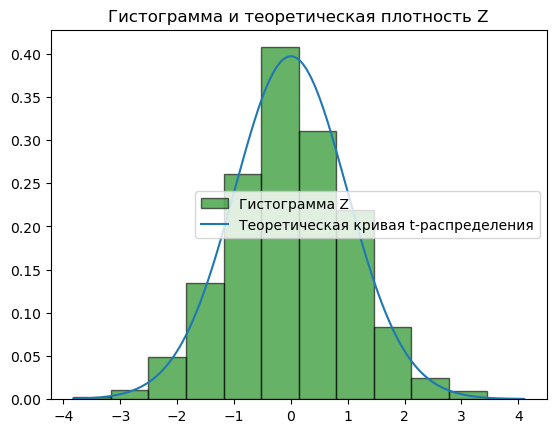

In [35]:
# 5.2 Построение графиков
plt.hist(Z_values, bins="sturges", density=True, alpha=0.6, color='g', edgecolor = 'black', label="Гистограмма Z")
x = np.linspace(min(Z_values), max(Z_values), 1000)
plt.plot(x, st.t.pdf(x, df=n-1), label="Теоретическая кривая t-распределения")
plt.legend()
plt.title("Гистограмма и теоретическая плотность Z")
plt.show()

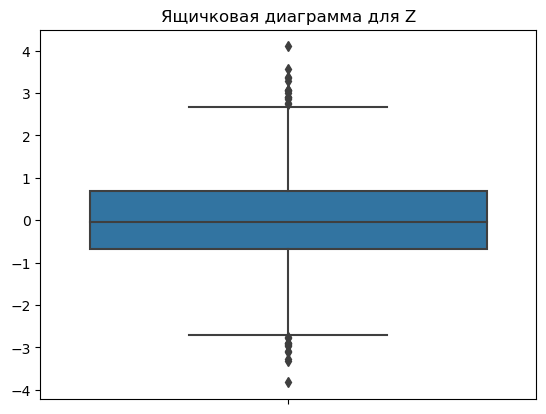

Фактическое количество выбросов: 27


In [36]:
sb.boxplot(y = Z_values)
plt.title("Ящичковая диаграмма для Z")
plt.show()
q1 = np.percentile(Z_values, 25)
q3 = np.percentile(Z_values, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in Z_values:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")